<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/Linear-Regression/Polynomial_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helper_poly import get_poly_pred
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [3]:
# Read the data from 'poly.csv' into a Pandas dataframe
df = pd.read_csv('poly.csv')

# Take a quick look at the dataframe
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


In [4]:
# Get the column values for x & y as numpy arrays
x = df[['x']].values
y = df['y'].values

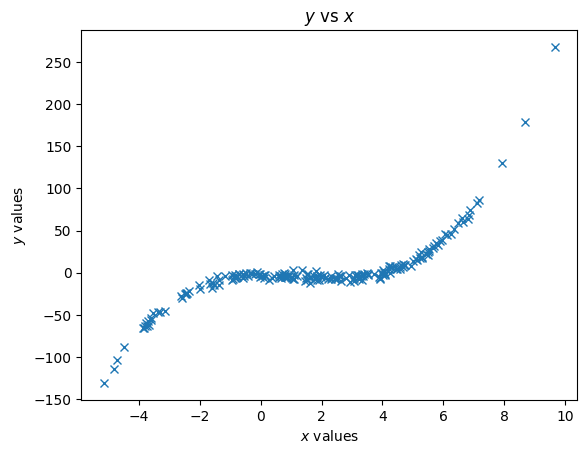

In [5]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$')
plt.show();

In [6]:
# Split the data into train and test sets
# Set the train size to 0.8 and random seed to 22
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 22 )

In [34]:
# Initialize a linear model
model = LinearRegression()

# Fit the model on the train data
model.fit(x_train, y_train)

#model.fit(x_, y)

# Get the predictions on the test data using the trained model
y_lin_pred = model.predict(x_test)

In [35]:
model.coef_, model.intercept_

(array([8.71932891]), -16.23354635361396)

In [32]:
model.coef_, model.intercept_

(array([9.61320482]), -17.532762410959737)

In [37]:
x_test.min()

-5.149434324591827

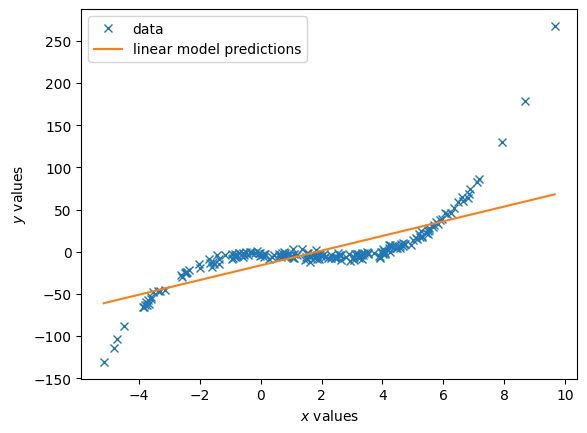

In [36]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x', label='data')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.plot(x_test, y_lin_pred, label='linear model predictions')
plt.legend();

⏸ Above is the line that minimizes MSE of the training data. How would you describe the results?

A. The model would perform better with more training data\
B. This line is a good fit to the data\
C. No straight line will fit this data well

In [9]:
### edTest(test_chow1) ###
# Type your answer within in the quotes given
answer1 = 'C'

In [24]:
### edTest(test_deg) ###
# Guess the correct polynomial degree based on the above graph
guess_degree = 1

# Predict on the entire polynomial transformed test data using helper function.
y_poly_pred = get_poly_pred(x_train, x_test, y_train, degree=guess_degree)

(160, 1) (40, 1) (160,)


In [25]:
# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted test data
y_test = y_test[idx]

# Linear predicted values
y_lin_pred = y_lin_pred[idx]

# Non-linear predicted values
y_poly_pred= y_poly_pred[idx]

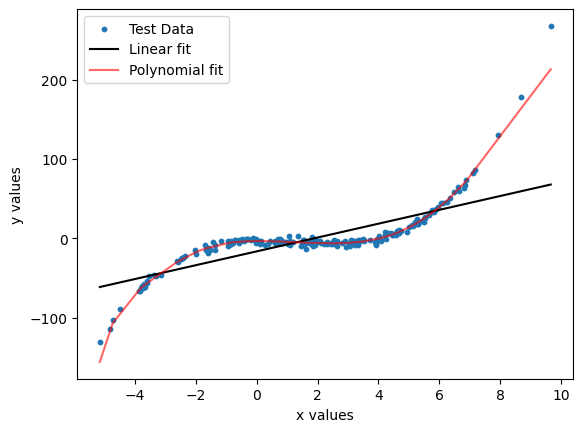

In [26]:
# First plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label="Test Data")

# Plot the linear regression fit curve
plt.plot(x_test,y_lin_pred,label="Linear fit", color='k')

# Plot the polynomial regression fit curve
plt.plot(x_test, y_poly_pred, label="Polynomial fit",color='red', alpha=0.6)

# Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [27]:
### edTest(test_poly_predictions) ###
# Calculate the residual values for the polynomial model
poly_residuals = y_test - y_poly_pred

In [28]:
### edTest(test_linear_predictions) ###
# Calculate the residual values for the linear model
lin_residuals = y_test - y_lin_pred

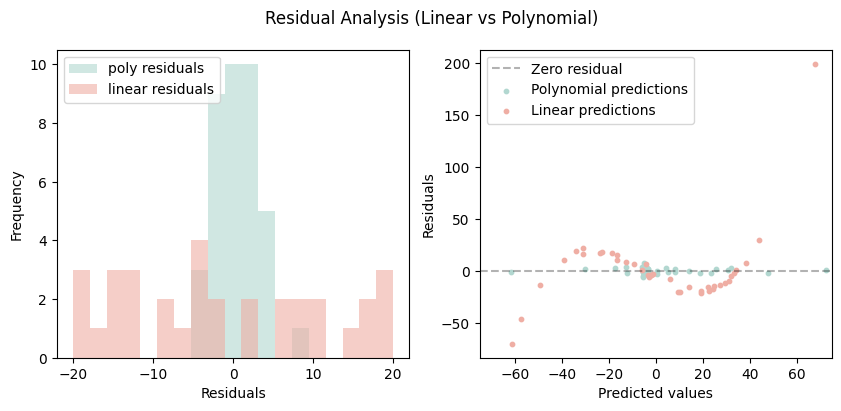

In [29]:
# Helper code to plot the residual values
# Plot the histograms of the residuals for the two cases

# Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins, label = 'poly residuals', color='#B2D7D0', alpha=0.6)

# Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = 'linear residuals', color='#EFAEA4', alpha=0.6)

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].hlines(0,-75,75, color='k', ls='--', alpha=0.3, label='Zero residual')
ax[1].scatter(y_poly_pred, poly_residuals, s=10, color='#B2D7D0', label='Polynomial predictions')
ax[1].scatter(y_lin_pred, lin_residuals, s = 10, color='#EFAEA4', label='Linear predictions' )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].legend(loc = 'upper left')
fig.suptitle('Residual Analysis (Linear vs Polynomial)')
plt.show();

⏸ What is it about the plots above that are sign that a linear model is not appropriate for the data?

A. Residuals not normally distributed\
B. Residuals distribution not clearly centered on zero\
C. Residuals do not have constant variance\
D. All of the above

In [16]:
### edTest(test_chow2) ###
# Type your answer within in the quotes given
answer2 = 'D'